## Slicing and Indexing DataFrames

Indexes are supercharged row and column names. Learn how they can be combined with slicing for powerful DataFrame subsetting.

### Explicit indexes

#### Setting a column as the index
`.set_index()`
- argument used to move a column from the body of the dataFrame to the index

In [1]:
import pandas as pd
import numpy as np

homelessness = pd.read_csv("dataset/homelessness.csv", index_col = 0)
homelessness.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


In [2]:
homeless = homelessness.set_index('region')
homeless.head()

,state,individuals,family_members,state_pop
region,,,,
East South Central,Alabama,2570.0,864.0,4887681
Pacific,Alaska,1434.0,582.0,735139
Mountain,Arizona,7259.0,2606.0,7158024
West South Central,Arkansas,2280.0,432.0,3009733
Pacific,California,109008.0,20964.0,39461588


In [3]:
# Removing an index
homeless.reset_index().head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


#### Dropping an index
- `.reset_index()` has a `drop` argument that allows discarding an index
- setting drop to True entirely removes a column

In [4]:
# Dropping an index
homeless.reset_index(drop = True).head()

,state,individuals,family_members,state_pop
0,Alabama,2570.0,864.0,4887681
1,Alaska,1434.0,582.0,735139
2,Arizona,7259.0,2606.0,7158024
3,Arkansas,2280.0,432.0,3009733
4,California,109008.0,20964.0,39461588


----
## Why index?
- indexes make subsetting simpler
    - dataframes have a subsetting method called "loc", which filters on index values

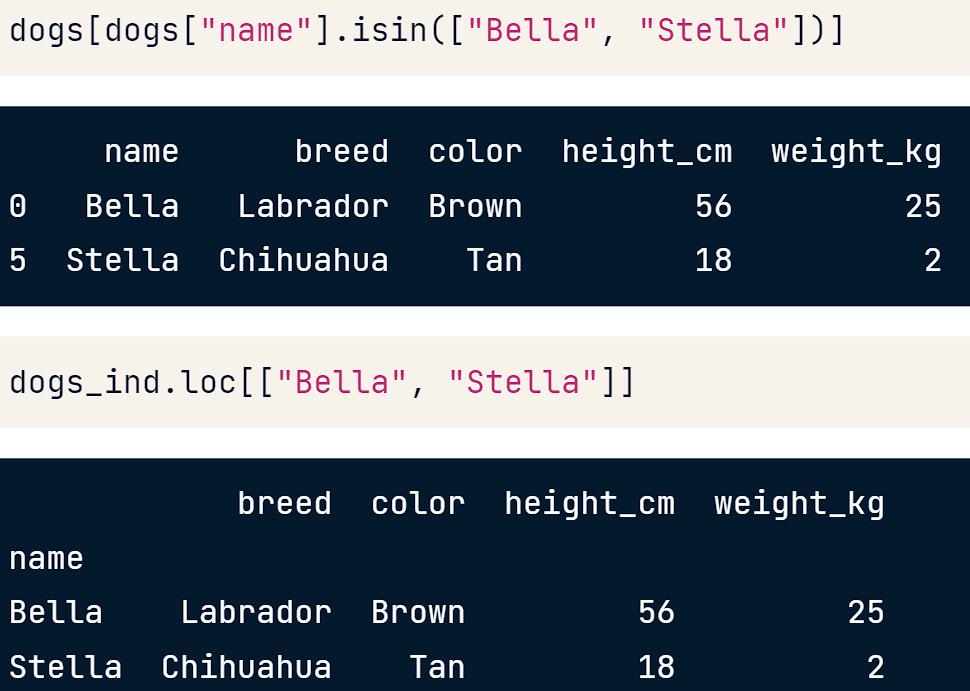

## Why index?
- index values don't need to be unique
- multi-level indexes aka hierarchical indexes
  - can include multiple columns in the index by passing a list of column names to set_index
  
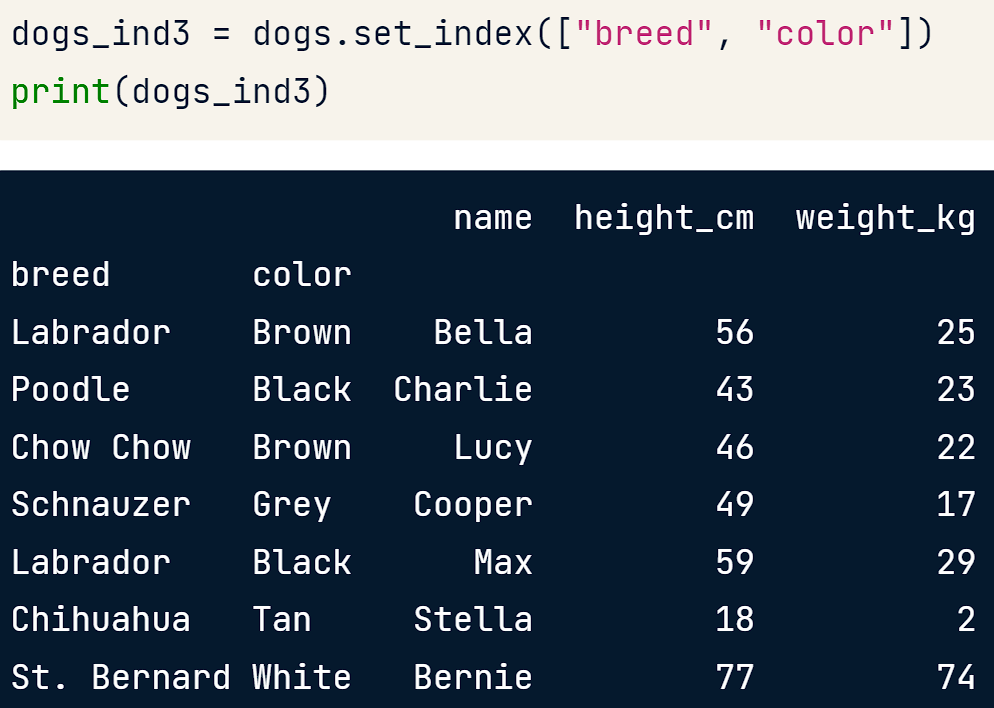

### Why index? 
- subset the outer later with a list
    - take a subset of rows at the outer level index, you pass a list of index values to loc

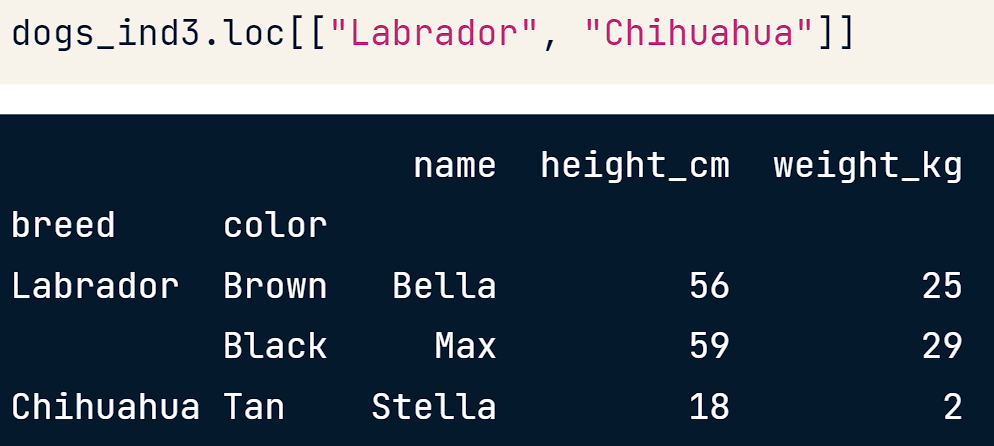

- subset inner levels with a list of tuples
    - to subset on inner levels, pssing a list of tuples is needed
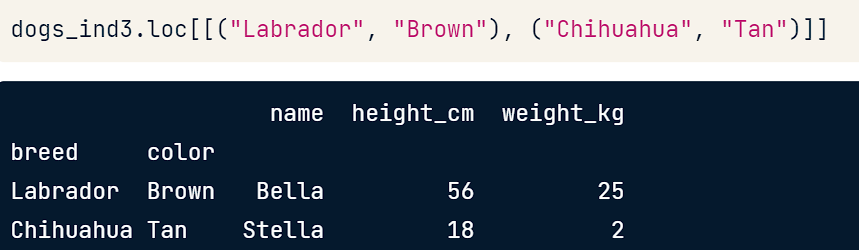

#### Sorting by index values
- `.sort_index()`
  - deafult: sort all index levles from outer to inner, in ascending order

#### Controlling sort_index
   - control by passing lists to the `level` and `ascending` arguments

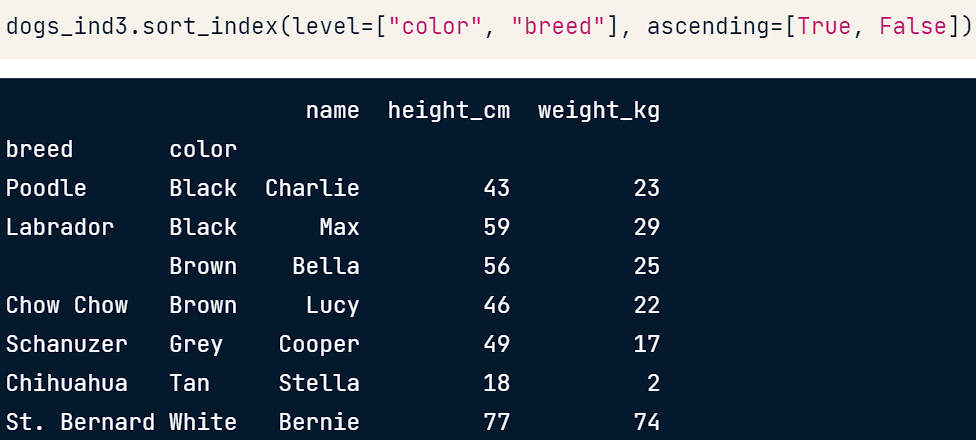

#### Issues with indexes
- index values are just data
- indexes violate "tidy data" principles
    - a concept where data stored in tabular form (like a DataFrame)
    - each row contains a single observation, and each variable is stored in its own column
- learning two syntaxes is needed
    - in pandas, the syntax for working with indexes is different from the syntax for working with columns
---

**Setting and removing indexes**

pandas allows you to designate columns as an index. This enables cleaner code when taking subsets (as well as providing more efficient lookup under some circumstances).

- Look at `temperatures`.
- Set the index of `temperatures` to "`city`", assigning to `temperatures_ind`.
- *Look at `temperatures_ind`. How is it different from `temperatures`?*
- Reset the index of `temperatures_ind`, keeping its contents.
- Reset the index of `temperatures_ind`, dropping its contents

In [5]:
# import dataset
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

temperatures = pd.read_csv("dataset/temperatures.csv", index_col = 0)
temperatures.head()

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


In [6]:
# Look at temperatures
print(temperatures)

# Index temperatures by city
temperatures_ind = temperatures.set_index('city')

# Look at temperatures_ind
print(temperatures_ind)

# Reset the index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the index, dropping its contents
print(temperatures_ind.reset_index(drop = True))

             date     city        country  avg_temp_c
0      2000-01-01  Abidjan  Côte D'Ivoire      27.293
1      2000-02-01  Abidjan  Côte D'Ivoire      27.685
2      2000-03-01  Abidjan  Côte D'Ivoire      29.061
3      2000-04-01  Abidjan  Côte D'Ivoire      28.162
4      2000-05-01  Abidjan  Côte D'Ivoire      27.547
...           ...      ...            ...         ...
16495  2013-05-01     Xian          China      18.979
16496  2013-06-01     Xian          China      23.522
16497  2013-07-01     Xian          China      25.251
16498  2013-08-01     Xian          China      24.528
16499  2013-09-01     Xian          China         NaN

[16500 rows x 4 columns]
               date        country  avg_temp_c
city                                          
Abidjan  2000-01-01  Côte D'Ivoire      27.293
Abidjan  2000-02-01  Côte D'Ivoire      27.685
Abidjan  2000-03-01  Côte D'Ivoire      29.061
Abidjan  2000-04-01  Côte D'Ivoire      28.162
Abidjan  2000-05-01  Côte D'Ivoire      27.5

**Subsetting with .loc[]**

The killer feature for indexes is `.loc[]`: a subsetting method that accepts index values. When you pass it a single argument, it will take a subset of rows.

The code for subsetting using `.loc[]` can be easier to read than standard square bracket subsetting, which can make your code less burdensome to maintain.

- Create a list called `cities` that contains "Moscow" and "Saint Petersburg".
- Use `[]` subsetting to filter `temperatures` for rows where the `city` column takes a value in the `cities` list.
- Use `.loc[]` subsetting to filter `temperatures_ind` for rows where the city is in the `cities` list.

In [7]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets
print(temperatures[temperatures["city"].isin(cities)])

# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

             date              city country  avg_temp_c
10725  2000-01-01            Moscow  Russia      -7.313
10726  2000-02-01            Moscow  Russia      -3.551
10727  2000-03-01            Moscow  Russia      -1.661
10728  2000-04-01            Moscow  Russia      10.096
10729  2000-05-01            Moscow  Russia      10.357
...           ...               ...     ...         ...
13360  2013-05-01  Saint Petersburg  Russia      12.355
13361  2013-06-01  Saint Petersburg  Russia      17.185
13362  2013-07-01  Saint Petersburg  Russia      17.234
13363  2013-08-01  Saint Petersburg  Russia      17.153
13364  2013-09-01  Saint Petersburg  Russia         NaN

[330 rows x 4 columns]
                        date country  avg_temp_c
city                                            
Moscow            2000-01-01  Russia      -7.313
Moscow            2000-02-01  Russia      -3.551
Moscow            2000-03-01  Russia      -1.661
Moscow            2000-04-01  Russia      10.096
Moscow    

**Setting multi-level indexes**

Indexes can also be made out of multiple columns, forming a multi-level index (sometimes called a hierarchical index). There is a trade-off to using these.

The benefit is that multi-level indexes make it more natural to reason about nested categorical variables. For example, in a clinical trial, you might have control and treatment groups. Then each test subject belongs to one or another group, and we can say that a test subject is nested inside the treatment group. Similarly, in the temperature dataset, the city is located in the country, so we can say a city is nested inside the country.

The main downside is that the code for manipulating indexes is different from the code for manipulating columns, so you have to learn two syntaxes and keep track of how your data is represented.

- Set the index of temperatures to the "country" and "city" columns, and assign this to temperatures_ind.
- Specify two country/city pairs to keep: "Brazil"/"Rio De Janeiro" and "Pakistan"/"Lahore", assigning to rows_to_keep.
- Print and subset temperatures_ind for rows_to_keep using .loc[].

In [8]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(["country", "city"])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil", "Rio De Janeiro"), ("Pakistan", "Lahore")]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

                               date  avg_temp_c
country  city                                  
Brazil   Rio De Janeiro  2000-01-01      25.974
         Rio De Janeiro  2000-02-01      26.699
         Rio De Janeiro  2000-03-01      26.270
         Rio De Janeiro  2000-04-01      25.750
         Rio De Janeiro  2000-05-01      24.356
...                             ...         ...
Pakistan Lahore          2013-05-01      33.457
         Lahore          2013-06-01      34.456
         Lahore          2013-07-01      33.279
         Lahore          2013-08-01      31.511
         Lahore          2013-09-01         NaN

[330 rows x 2 columns]


**Sorting by index values**

Previously, you changed the order of the rows in a DataFrame by calling `.sort_values()`. It's also useful to be able to sort by elements in the index. For this, you need to use `.sort_index()`.

- Sort temperatures_ind by the index values.
- Sort temperatures_ind by the index values at the "city" level.
- Sort temperatures_ind by ascending country then descending city.

In [9]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index(level = 'country', ascending = True))

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level = 'city', ascending = True))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level = ['country', 'city'], ascending = [True, False]))

                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]
                             date  avg_temp_c
country       city                           
Côte D'Ivoire Abidjan  2000-01-01      27.293
              Abidjan  2000-02-01      27.685
              Abidjan  2000-03-01      29.061
              Abidjan  2000-04-01      28.162
              Abidjan  2000-05-01      27.547
...                           ...         ...
China         Xian     2013-05-01      18.979
 

---

### Slicing and subsetting with .loc and .iloc

#### Slicing
- a technique for selecting consecutive elements from objects

#### Slicing List
- to slice a *list*, pass the first and last positions separated by a colon into square brackets
- the last position is always not included in the list 
   - example: [2:5] - 2, 3, 4
- to start from the beginning of the list, omit the zero
    - example: [:3] - 0, 1, 2
- slicing with colon on its own returns the whole list

In [10]:
temperatures[2:5]

,date,city,country,avg_temp_c
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


In [11]:
temperatures[:3]

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061


In [12]:
temperatures[:]

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547
...,...,...,...,...
16495,2013-05-01,Xian,China,18.979
16496,2013-06-01,Xian,China,23.522
16497,2013-07-01,Xian,China,25.251
16498,2013-08-01,Xian,China,24.528


#### Sort the index before slicing
- before slicing DataFrame, ii's necessary to sort the index

#### Slicing the outer index level
- use .loc[], passing in the first and last values separated by a colon
- final values is included if using index

In [13]:
# Slicing the inner index level the bad way
temperatures.loc['Abidjan': 'Xian']

,date,city,country,avg_temp_c


> Pandas doesn't throw an error to inform about the error.

#### Slicing the inner index level
- pass the first and last positions as tuples

In [14]:
# Slicing the inner index level the good way
#temperatures.loc[("Abidjan" , "Côte D'Ivoire") : ("Xian" , "China")]

#### Slicing columns
- simplest case is subsetting columns but keeping all rows
- pass a colon as the first argument to loc
- second argument takes column names as the first and last positions to slice on

In [15]:
# Slicing columns 
temperatures.loc[:, "city" : "country"]

,city,country
0,Abidjan,Côte D'Ivoire
1,Abidjan,Côte D'Ivoire
2,Abidjan,Côte D'Ivoire
3,Abidjan,Côte D'Ivoire
4,Abidjan,Côte D'Ivoire
...,...,...
16495,Xian,China
16496,Xian,China
16497,Xian,China
16498,Xian,China


#### Slice twice - slice rows and slice columns
- pass the appropriate slice to each argument

In [16]:
# Slicing columns 
#temperatures.loc[("Addis Abeba" , "Ethiopia") : ("Xian" , "China"), "city" : "country"]

#### Slicing to subset DataFrames by a range of dates
- `.set_index('date').sort_index()`
- slicing by partial dates is possible (ex: slice per year)

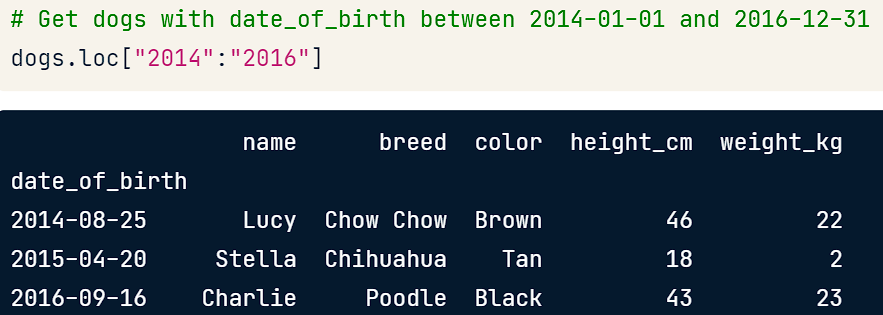

#### Subsetting by row/column number
- using the iloc method
- uses similar syntax to slicing lists, except there are 2 arugments:
    - one for rows
    - one for columns

In [17]:
# iloc[rows, columns]
temperatures.iloc[2:5, 1:4]

,city,country,avg_temp_c
2,Abidjan,Côte D'Ivoire,29.061
3,Abidjan,Côte D'Ivoire,28.162
4,Abidjan,Côte D'Ivoire,27.547


---

**Slicing index values**

Slicing lets you select consecutive elements of an object using `first:last` syntax. DataFrames can be sliced by index values or by row/column number; we'll start with the first case. This involves slicing inside the `.loc[]` method.

Compared to slicing lists, there are a few things to remember.

- You can only slice an index if the index is sorted (using `.sort_index()`).
- To slice at the outer level, `first` and ``last` can be strings.
- To slice at inner levels, `first` and `last` should be tuples.
- If you pass a single slice to `.loc[]`, it will slice the rows.

- Sort the index of `temperatures_ind`.
- Use slicing with `.loc[]` to get these subsets:
    - from Pakistan to Russia.
    - from Lahore to Moscow. (This will return nonsense.)
    - from Pakistan, Lahore to Russia, Moscow.

In [18]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()
print(temperatures_srt)

                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]


In [19]:
temperatures_srt = temperatures_ind.sort_index()
print(temperatures_srt)

                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]


In [20]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()
print(temperatures_srt)

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc["Pakistan":"Russia"])

                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]
                                 date  avg_temp_c
country  city                                    
Pakistan Faisalabad        2000-01-01      12.792
         Faisalabad        2000-02-01      14.339
         Faisalabad        2000-03-01      20.309
         Faisalabad        2000-04-01      29.072
         Faisalabad        2000-05-01      34.845
...                               ...         ...
Russia   Saint 

In [21]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc['Pakistan':'Russia'])

print(" --- ")

# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc['Lahore':'Moscow'])

print(" --- ")

# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[("Pakistan" , "Lahore") : ("Russia", "Moscow")])

                                 date  avg_temp_c
country  city                                    
Pakistan Faisalabad        2000-01-01      12.792
         Faisalabad        2000-02-01      14.339
         Faisalabad        2000-03-01      20.309
         Faisalabad        2000-04-01      29.072
         Faisalabad        2000-05-01      34.845
...                               ...         ...
Russia   Saint Petersburg  2013-05-01      12.355
         Saint Petersburg  2013-06-01      17.185
         Saint Petersburg  2013-07-01      17.234
         Saint Petersburg  2013-08-01      17.153
         Saint Petersburg  2013-09-01         NaN

[1155 rows x 2 columns]
 --- 
                          date  avg_temp_c
country city                              
Mexico  Mexico      2000-01-01      12.694
        Mexico      2000-02-01      14.677
        Mexico      2000-03-01      17.376
        Mexico      2000-04-01      18.294
        Mexico      2000-05-01      18.562
...               

**Slicing in both directions**

You've seen slicing DataFrames by rows and by columns, but since DataFrames are two-dimensional objects, it is often natural to slice both dimensions at once. That is, by passing two arguments to `.loc[]`, you can subset by rows and columns in one go.

- Use `.loc[]` slicing to subset rows from India, Hyderabad to Iraq, Baghdad.
- Use `.loc[]` slicing to subset columns from `date` to `avg_temp_c`.
Slice in both directions at once from Hyderabad to Baghdad, and `date` to `avg_temp_c`.

In [22]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[('India', 'Hyderabad') : ('Iraq' , 'Baghdad')])

# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:, 'date' : 'avg_temp_c'])

# Subset in both directions at once
print(temperatures_srt.loc[("India" , 'Hyderabad') : ('Iraq' , 'Baghdad'), 'date' : 'avg_temp_c'])

                         date  avg_temp_c
country city                             
India   Hyderabad  2000-01-01      23.779
        Hyderabad  2000-02-01      25.826
        Hyderabad  2000-03-01      28.821
        Hyderabad  2000-04-01      32.698
        Hyderabad  2000-05-01      32.438
...                       ...         ...
Iraq    Baghdad    2013-05-01      28.673
        Baghdad    2013-06-01      33.803
        Baghdad    2013-07-01      36.392
        Baghdad    2013-08-01      35.463
        Baghdad    2013-09-01         NaN

[2145 rows x 2 columns]
                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020

**Slicing time series**

Slicing is particularly useful for time series since it's a common thing to want to filter for data within a date range. Add the `date` column to the index, then use `.loc[]` to perform the subsetting. The important thing to remember is to keep your dates in ISO 8601 format, that is, `"yyyy-mm-dd"` for year-month-day, `"yyyy-mm"` for year-month, and `"yyyy"` for year.

Recall from Chapter 1 that you can combine multiple Boolean conditions using logical operators, such as `&`. To do so in one line of code, you'll need to add parentheses `()` around each condition.

- Use Boolean conditions, not `.isin()` or `.loc[]`, and the full date `"yyyy-mm-dd"`, to subset `temperatures` for rows in 2010 and 2011 and print the results.
- Set the index of `temperatures` to the `date` column and sort it.
- Use `.loc[]` to subset `temperatures_ind` for rows in 2010 and 2011.
- Use `.loc[]` to subset `temperatures_ind` for rows from Aug 2010 to Feb 2011.

In [23]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures['date'] >= '2010-01-01') & (temperatures['date'] <= '2011-12-01')]
print(temperatures_bool)

# Set date as the index and sort the index
temperatures_ind = temperatures.set_index('date').sort_index()

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc['2010':'2011'])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc['2010-08-01':'2011-02-01'])

             date     city        country  avg_temp_c
120    2010-01-01  Abidjan  Côte D'Ivoire      28.270
121    2010-02-01  Abidjan  Côte D'Ivoire      29.262
122    2010-03-01  Abidjan  Côte D'Ivoire      29.596
123    2010-04-01  Abidjan  Côte D'Ivoire      29.068
124    2010-05-01  Abidjan  Côte D'Ivoire      28.258
...           ...      ...            ...         ...
16474  2011-08-01     Xian          China      23.069
16475  2011-09-01     Xian          China      16.775
16476  2011-10-01     Xian          China      12.587
16477  2011-11-01     Xian          China       7.543
16478  2011-12-01     Xian          China      -0.490

[2400 rows x 4 columns]
                  city    country  avg_temp_c
date                                         
2010-01-01  Faisalabad   Pakistan      11.810
2010-01-01   Melbourne  Australia      20.016
2010-01-01   Chongqing      China       7.921
2010-01-01   São Paulo     Brazil      23.738
2010-01-01   Guangzhou      China      14.136
...  

**Subsetting by row/column number**

The most common ways to subset rows are the ways we've previously discussed: using a Boolean condition or by index labels. However, it is also occasionally useful to pass row numbers.

This is done using `.iloc[]`, and like `.loc[]`, it can take two arguments to let you subset by rows and columns.

Use `.iloc[]` on `temperatures` to take subsets.

- Get the 23rd row, 2nd column (index positions 22 and 1).
- Get the first 5 rows (index positions 0 to 5).
- Get all rows, columns 3 and 4 (index positions 2 to 4).
- Get the first 5 rows, columns 3 and 4.

In [24]:
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22, 2])

print(" ----- ")

# Use slicing to get the first 5 rows
print(temperatures.iloc[0:5, :])

print(" ----- ")


# Use slicing to get columns 3 to 4
print(temperatures.iloc[:, 2:4])

print(" ----- ")


# Use slicing in both directions at once
print(temperatures.iloc[0:5, 2:4])

Côte D'Ivoire
 ----- 
         date     city        country  avg_temp_c
0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
 ----- 
             country  avg_temp_c
0      Côte D'Ivoire      27.293
1      Côte D'Ivoire      27.685
2      Côte D'Ivoire      29.061
3      Côte D'Ivoire      28.162
4      Côte D'Ivoire      27.547
...              ...         ...
16495          China      18.979
16496          China      23.522
16497          China      25.251
16498          China      24.528
16499          China         NaN

[16500 rows x 2 columns]
 ----- 
         country  avg_temp_c
0  Côte D'Ivoire      27.293
1  Côte D'Ivoire      27.685
2  Côte D'Ivoire      29.061
3  Côte D'Ivoire      28.162
4  Côte D'Ivoire      27.547


---

### Working with Pivot Tables
- focus: subsetting and calculations on pivot tables

- `.pivot_table()`
  - "pivot tables are just dataframes with sorted indexes."
  - first arugment is the column name contains the values to aggregate
  - index - second argument, lists the columns to group by and displays the rows
  - columns - third argument, lists the columns to group  by and display in columns

#### The axis argument
- axis
  - index - to calculate the statistic across rows (default)
  - columns - to calculate the summary statistics for each row

In [25]:
# using index
temperatures.mean(axis = 'index')

avg_temp_c    19.732877
dtype: float64

In [26]:
# using columns
temperatures.mean(axis = 'columns')

0        27.293
1        27.685
2        29.061
3        28.162
4        27.547
          ...  
16495    18.979
16496    23.522
16497    25.251
16498    24.528
16499       NaN
Length: 16500, dtype: float64

**Pivot temperature by city and year**

It's interesting to see how temperatures for each city change over time—looking at every month results in a big table, which can be tricky to reason about. Instead, let's look at how temperatures change by year.

You can access the components of a date (year, month and day) using code of the form `dataframe["column"].dt.component`. For example, the month component is `dataframe["column"].dt.month`, and the year component is `dataframe["column"].dt.year`.

Once you have the year column, you can create a pivot table with the data aggregated by city and year, which you'll explore in the coming exercises.

- Add a `year` column to `temperatures`, from the `year` component of the `date` column.
- Make a pivot table of the `avg_temp_c` column, with `country` and `city` as rows, and `year` as columns. Assign to `temp_by_country_city_vs_year`, and look at the result.

In [27]:
# Add a year column to temperatures
temperatures['year'] = pd.to_datetime(temperatures['date'], errors = 'coerce')
#temperatures['year'] = temperatures['date'].dt.year
# it din'y work here, but in datacamp it did.

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table('avg_temp_c', index = ['country', 'city'], columns = 'year')

# See the result
print(temp_by_country_city_vs_year)

year                            2000-01-01  2000-02-01  2000-03-01  \
country       city                                                   
Afghanistan   Kabul                  3.326       3.454       9.612   
Angola        Luanda                25.077      25.493      26.496   
Australia     Melbourne             18.527      22.095      18.945   
              Sydney                18.470      20.713      20.220   
Bangladesh    Dhaka                 18.829      20.947      26.035   
...                                    ...         ...         ...   
United States Chicago                0.137       4.083       8.274   
              Los Angeles           10.772      10.262      12.335   
              New York              -3.168      -0.162       6.391   
Vietnam       Ho Chi Minh City      26.647      26.672      27.655   
Zimbabwe      Harare                22.119      21.569      22.370   

year                            2000-04-01  2000-05-01  2000-06-01  \
country       city 

**Subsetting pivot tables**

A pivot table is just a DataFrame with sorted indexes, so the techniques you have learned already can be used to subset them. In particular, the `.loc[]` + slicing combination is often helpful.

Use `.loc[]` on `temp_by_country_city_vs_year` to take subsets.

- From Egypt to India.
- From Egypt, Cairo to India, Delhi.
- From Egypt, Cairo to India, Delhi, and 2005 to 2010.

In [28]:
# Subset for Egypt to India
temp_by_country_city_vs_year.loc['Egypt' : 'India']

# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[('Egypt' , 'Cario') : ('India' , 'Delhi')]


# Subset in both directions at once
# temp_by_country_city_vs_year.loc[('Egypt','Cairo'):('India','Delhi'), 2005:2010]

year                  2000-01-01  2000-02-01  2000-03-01  2000-04-01  \
country  city                                                          
Egypt    Gizeh            12.669      13.728      16.026      22.396   
Ethiopia Addis Abeba      17.391      19.183      20.230      20.398   
France   Paris             3.845       6.587       7.872      10.067   
Germany  Berlin            1.324       4.718       5.806      11.805   
India    Ahmadabad        20.781      21.246      26.565      32.275   
         Bangalore        23.673      25.351      27.238      28.501   
         Bombay           25.599      24.076      25.489      28.188   
         Calcutta         19.196      21.275      26.881      30.165   
         Delhi            15.201      16.388      22.921      31.266   

year                  2000-05-01  2000-06-01  2000-07-01  2000-08-01  \
country  city                                                          
Egypt    Gizeh            24.927      27.514      29.586      28.090   
Ethiopia Addis Abeba      19.977      18.254      17.109      16.944   
France   Paris            15.451      17.666      16.954      19.512   
Germany  Berlin           16.376      18.432      16.932      18.930   
India    Ahmadabad        32.847      32.490      28.678      28.616   
         Bangalore        28.059      25.140      25.015      24.333   
         Bombay           28.860      28.342      27.188      27.461   
         Calcutta         30.245      29.861      29.320      29.694   
         Delhi            34.524      33.074      30.925      30.687   

year                  2000-09-01  2000-10-01  ...  2012-12-01  2013-01-01  \
country  city                                 ...                           
Egypt    Gizeh            26.400      22.370  ...      15.522      14.187   
Ethiopia Addis Abeba      17.542      17.113  ...      17.808      18.852   
France   Paris            16.548      11.676  ...       5.593       3.044   
Germany  Berlin           14.656      12.284  ...       0.999       0.113   
India    Ahmadabad        29.087      29.285  ...      22.325      19.645   
         Bangalore        25.280      24.635  ...      23.881      24.168   
         Bombay           27.997      28.820  ...      26.828      24.187   
         Calcutta         28.846      28.017  ...      19.621      17.757   
         Delhi            30.083      28.164  ...      16.566      13.756   

year                  2013-02-01  2013-03-01  2013-04-01  2013-05-01  \
country  city                                                          
Egypt    Gizeh            15.931      19.695      21.146      27.100   
Ethiopia Addis Abeba      20.047      21.180      20.570      19.774   
France   Paris             2.456       4.570       9.559      11.703   
Germany  Berlin            0.314      -0.391       9.088      14.139   
India    Ahmadabad        22.726      27.196      30.762      33.856   
         Bangalore        25.798      28.057      29.593      29.189   
         Bombay           25.005      26.301      27.335      29.718   
         Calcutta         21.982      27.702      30.435      30.921   
         Delhi            17.824      24.025      29.304      34.746   

year                  2013-06-01  2013-07-01  2013-08-01  2013-09-01  
country  city                                                         
Egypt    Gizeh            28.392      28.217      28.588         NaN  
Ethiopia Addis Abeba      18.736      18.148      19.005         NaN  
France   Paris            16.340      21.186      19.235         NaN  
Germany  Berlin           17.473      20.901      19.335         NaN  
India    Ahmadabad        31.099      28.073      27.512         NaN  
         Bangalore        25.835      25.008      25.236         NaN  
         Bombay           27.686      26.519      26.953         NaN  
         Calcutta         30.618      30.000      29.539         NaN  
         Delhi            33.066      31.053      29.900       

**Calculating on a pivot table**

Pivot tables are filled with summary statistics, but they are only a first step to finding something insightful. Often you'll need to perform further calculations on them. A common thing to do is to find the rows or columns where the highest or lowest value occurs.

Recall from Chapter 1 that you can easily subset a Series or DataFrame to find rows of interest using a logical condition inside of square brackets. For example: `series[series > value]`

- Calculate the mean temperature for each year, assigning to `mean_temp_by_year`.
- Filter `mean_temp_by_year` for the year that had the highest mean temperature.
- Calculate the mean temperature for each city (across columns), assigning to `mean_temp_by_city`.
- Filter `mean_temp_by_city` for the city that had the lowest mean temperature.

In [29]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis = 'columns')

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

year
2002-07-01    25.35836
dtype: float64
country  city  
China    Harbin    4.858494
dtype: float64


> With an average temperature just above freezing, Harbin is famous for its ice sculpture festival.

---

## [4] Creating and Visualizing DataFrames

Learn to visualize the contents of your DataFrames, handle missing data values, and import data from and export data to CSV files.

### Visualizing your data
#### Histograms
- displays distribution
- `bins`
  - argument used to adjust the nummber of bars
  - increasing or decreasing bins can give a better idea of what the distribution looks like

In [30]:
# import necessary library
# shows the distribution of a numeric varaible
import matplotlib.pyplot as plt

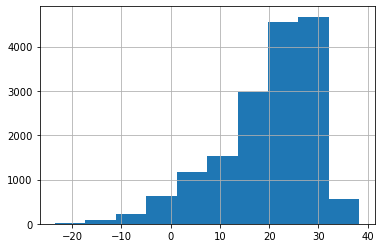

In [31]:
temperatures['avg_temp_c'].hist()
plt.show()

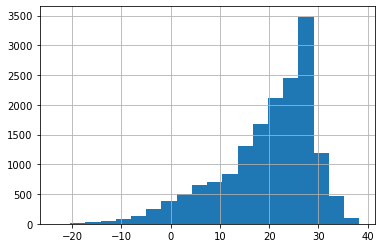

In [32]:
temperatures['avg_temp_c'].hist(bins = 20)
plt.show()

#### Bar plots
- reveals the relationship between a categorical variable and numeric variable
- `kind = 'bar'`

In [33]:
avg_temp_by_country = temperatures.groupby('country')['avg_temp_c'].mean()
pd.DataFrame(avg_temp_by_country)

,avg_temp_c
country,
Afghanistan,15.525756
Angola,24.387659
Australia,16.028104
Bangladesh,26.164378
Brazil,23.906030
Burma,27.514213
Canada,6.637158
Chile,6.345768
China,12.983107


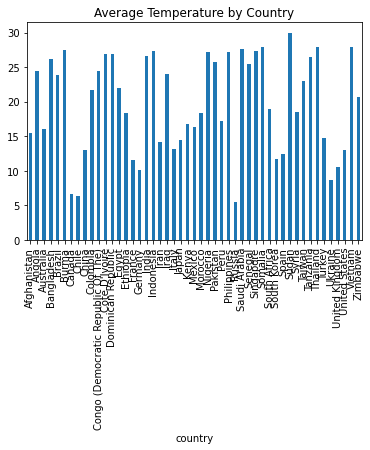

In [34]:
avg_temp_by_country.plot(kind = 'bar',
                         title = 'Average Temperature by Country')
plt.show()

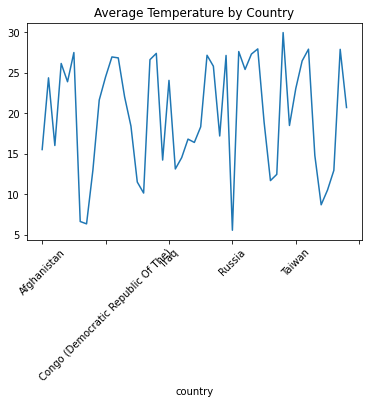

In [35]:
# rot - rotates axis labels
avg_temp_by_country.plot(x = 'date',
                         y = 'avg_temp_c',
                         kind = 'line',
                         rot = 45,
                         title = 'Average Temperature by Country')
plt.show()

### Scatter plots
- used for visualizing relationships between two numeric variables

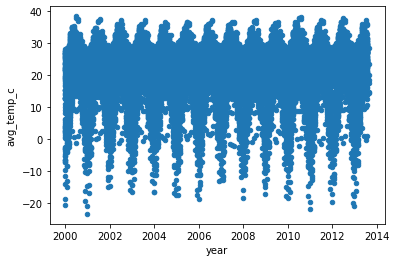

In [36]:
temperatures.plot(x = 'year', y = 'avg_temp_c', kind = 'scatter')
plt.show()

### Layering plots
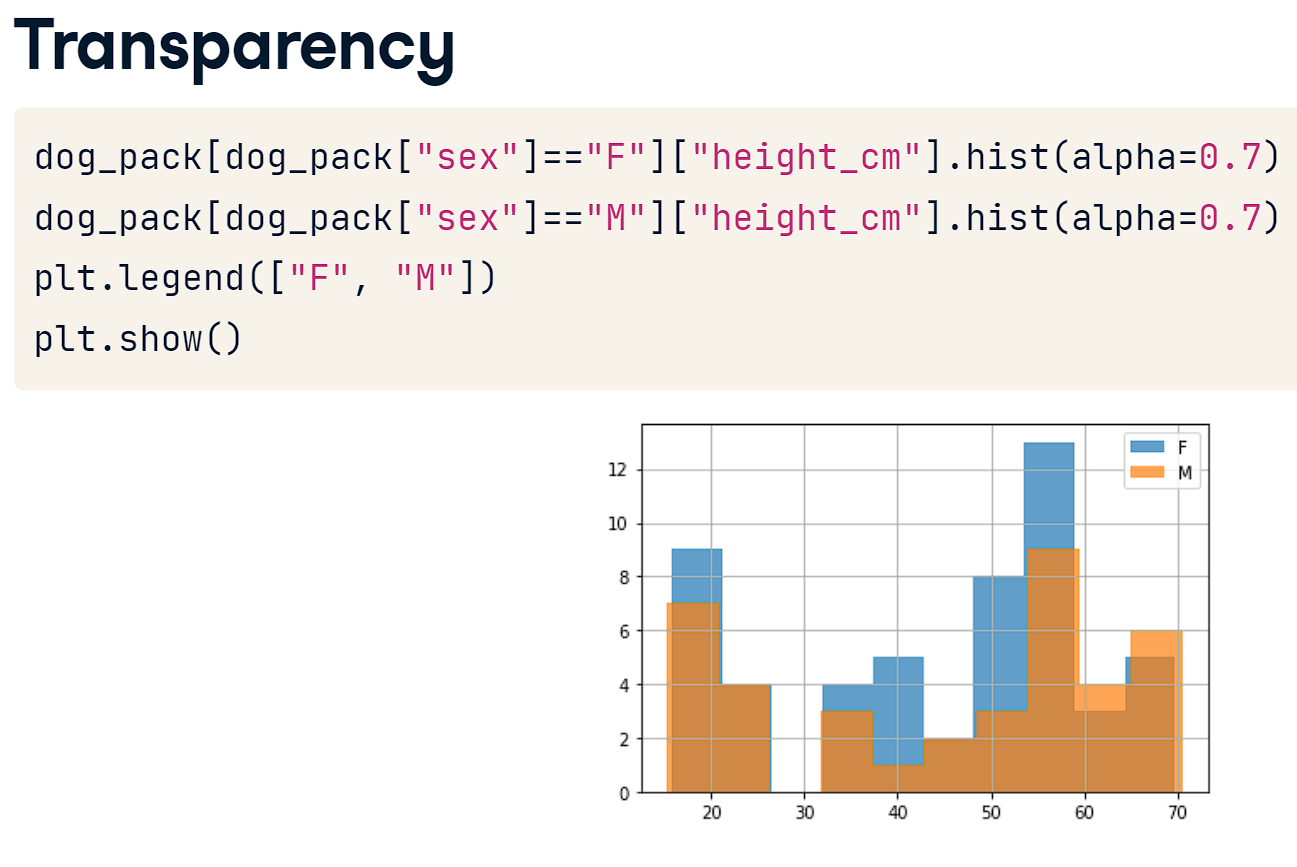

---

**Which avocado size is most popular?**

Avocados are increasingly popular and delicious in guacamole and on toast. The Hass Avocado Board keeps track of avocado supply and demand across the USA, including the sales of three different sizes of avocado. In this exercise, you'll use a bar plot to figure out which size is the most popular.

Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables, but you'll often have to manipulate your data first in order to get the numbers you need for plotting.

- Print the head of the `avocados` dataset. What columns are available?
- For each avocado size group, calculate the total number sold, storing as `nb_sold_by_size`.
- Create a bar plot of the number of avocados sold by size.

In [37]:
avocados = pd.read_csv("dataset/avocado.csv", index_col = 0)
avocados.head()

,type,year,avg_price,size,nb_sold
date,,,,,
2015-12-27,conventional,2015,0.95,small,9626901.09
2015-12-20,conventional,2015,0.98,small,8710021.76
2015-12-13,conventional,2015,0.93,small,9855053.66
2015-12-06,conventional,2015,0.89,small,9405464.36
2015-11-29,conventional,2015,0.99,small,8094803.56


                    type  year  avg_price         size     nb_sold
date                                                              
2015-12-27  conventional  2015       0.95        small  9626901.09
2015-12-20  conventional  2015       0.98        small  8710021.76
2015-12-13  conventional  2015       0.93        small  9855053.66
2015-12-06  conventional  2015       0.89        small  9405464.36
2015-11-29  conventional  2015       0.99        small  8094803.56
...                  ...   ...        ...          ...         ...
2018-02-04       organic  2018       1.53  extra_large     1703.52
2018-01-28       organic  2018       1.61  extra_large     1270.61
2018-01-21       organic  2018       1.63  extra_large     1490.02
2018-01-14       organic  2018       1.59  extra_large     1580.01
2018-01-07       organic  2018       1.51  extra_large     1289.07

[1014 rows x 5 columns]


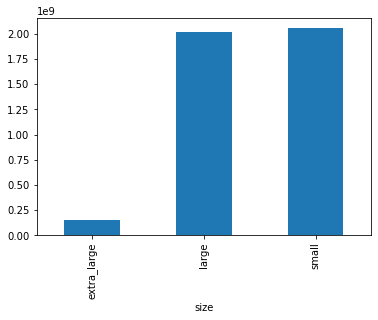

In [38]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados)

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind = 'bar')

# Show the plot
plt.show()

**Changes in sales over time**

Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point. In this exercise, you'll visualize the change in avocado sales over three years.

- Get the total number of avocados sold on each date. The DataFrame has two rows for each date—one for organic, and one for conventional. Save this as `nb_sold_by_date`.
- Create a line plot of the number of avocados sold.

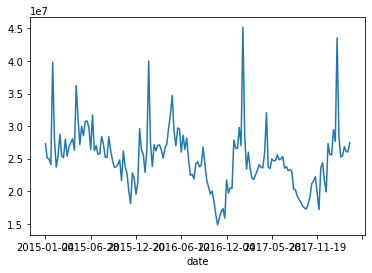

In [39]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind = 'line')

# Show the plot
plt.show()

> it looks like the number of avocados spikes around the same time each year.

**Avocado supply and demand**

Scatter plots are ideal for visualizing relationships between numerical variables. In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. If they're related, you may be able to use one number to predict the other.

- Create a scatter plot with `nb_sold` on the x-axis and `avg_price` on the y-axis. Title it `"Number of avocados sold vs. average price"`.
- Show the plot.

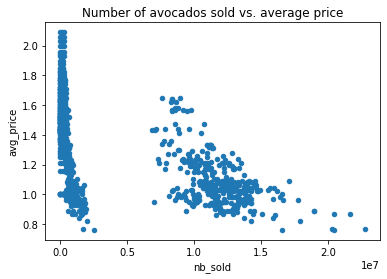

In [40]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(x = 'nb_sold', y = 'avg_price', kind = 'scatter', title = 'Number of avocados sold vs. average price')

# Show the plot
plt.show()

> It looks like when more avocados are sold, prices go down. However, this doesn't mean that fewer sales causes higher prices - we can only tell that they're correlated with each other.

**Price of conventional vs. organic avocados**

Creating multiple plots for different subsets of data allows you to compare groups. In this exercise, you'll create multiple histograms to compare the prices of conventional and organic avocados.

- Subset `avocados` for the conventional type, and the average price column. Create a histogram.
- Create a histogram of `avg_price` for organic type avocados.
- Add a legend to your plot, with the names "conventional" and "organic".
- Show your plot.

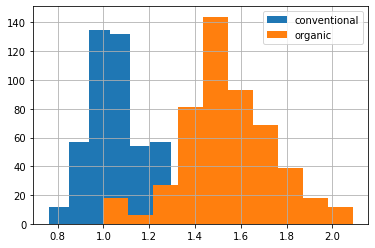

In [41]:
# Histogram of conventional avg_price 
avocados[avocados['type'] == 'conventional']['avg_price'].hist()

# Histogram of organic avg_price
avocados[avocados['type'] == 'organic']['avg_price'].hist()

# Add a legend
plt.legend(['conventional', 'organic'])

# Show the plot
plt.show()

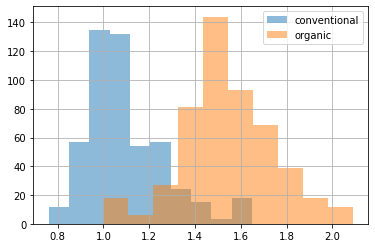

In [42]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha = 0.5)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha = 0.5)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

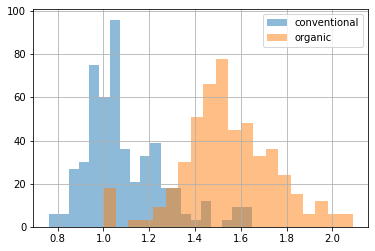

In [43]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha = 0.5, bins = 20)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha = 0.5, bins = 20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

> We can see that on average, organic avocados are more expensive than conventional ones, but their price distributions have some overlap.

---

### Missing values
- denoted as NaN (Not A Number)

#### Detecting missing values
- `.isna()`
 - displays Boolean for every single value indicating whether the value is missing or not
- `.isna().any()`
 - displays one value for each variable that tells if there are any missing values in that column but not in any of the others
- `.isna().sum()`
  - combining the sum of 'True' to count the number of NaNs in each column

In [44]:
avocados.isna()

,type,year,avg_price,size,nb_sold
date,,,,,
2015-12-27,False,False,False,False,False
2015-12-20,False,False,False,False,False
2015-12-13,False,False,False,False,False
2015-12-06,False,False,False,False,False
2015-11-29,False,False,False,False,False
...,...,...,...,...,...
2018-02-04,False,False,False,False,False
2018-01-28,False,False,False,False,False
2018-01-21,False,False,False,False,False


In [45]:
avocados.isna().any()

type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool

In [46]:
avocados.isna().sum()

type         0
year         0
avg_price    0
size         0
nb_sold      0
dtype: int64

### Removing missing values
- `.dropna()`
 - removing the rows that contains missing values
 - not ideal if there is a lot of missing data, since it means losing a lot of observations
- `.fillna(0)`
 - replace missing values with another value

**Finding missing values**

Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.

`pandas` has been imported as `pd` and `avocados_2016`, a subset of avocados that contains only sales from 2016, is available.

- Print a DataFrame that shows whether each value in `avocados_2016` is missing or not.
- Print a summary that shows whether any value in each column is missing or not.
- Create a bar plot of the total number of missing values in each column.

In [52]:
avocados_2016 = avocados[avocados['year'] == 2016]

             type   year  avg_price   size  nb_sold
date                                               
2016-12-25  False  False      False  False    False
2016-12-18  False  False      False  False    False
2016-12-11  False  False      False  False    False
2016-12-04  False  False      False  False    False
2016-11-27  False  False      False  False    False
...           ...    ...        ...    ...      ...
2016-01-31  False  False      False  False    False
2016-01-24  False  False      False  False    False
2016-01-17  False  False      False  False    False
2016-01-10  False  False      False  False    False
2016-01-03  False  False      False  False    False

[312 rows x 5 columns]
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


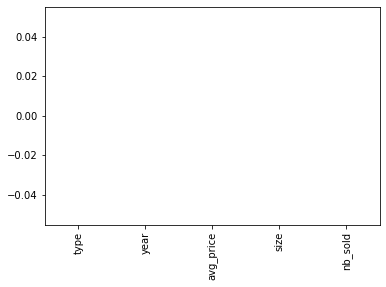

In [55]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados_2016.isna())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind = 'bar')

# Show plot
plt.show()

**Removing missing values**

Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values.

- Remove the rows of `avocados_2016` that contain missing values and store the remaining rows in `avocados_complete`.
- Verify that all missing values have been removed from `avocados_complete`. Calculate each column that has NAs and print.

In [59]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


**Replacing missing values**

Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0— you'll do this here. However, when you replace missing values, you make assumptions about what a missing value means. In this case, you will assume that a missing number sold means that no sales for that avocado type were made that week.

In this exercise, you'll see how replacing missing values can affect the distribution of a variable using histograms. You can plot histograms for multiple variables at a time as follows:

`dogs[["height_cm", "weight_kg"]].hist()`

- A list has been created, `cols_with_missing`, containing the names of columns with missing values: `"small_sold",` `"large_sold"`, and `"xl_sold"`.
- Create a histogram of those columns.
- Show the plot.

In [64]:
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create histograms showing the distributions cols_with_missing
# avocados_2016[cols_with_missing].hist()

# Show the plot
# plt.show()

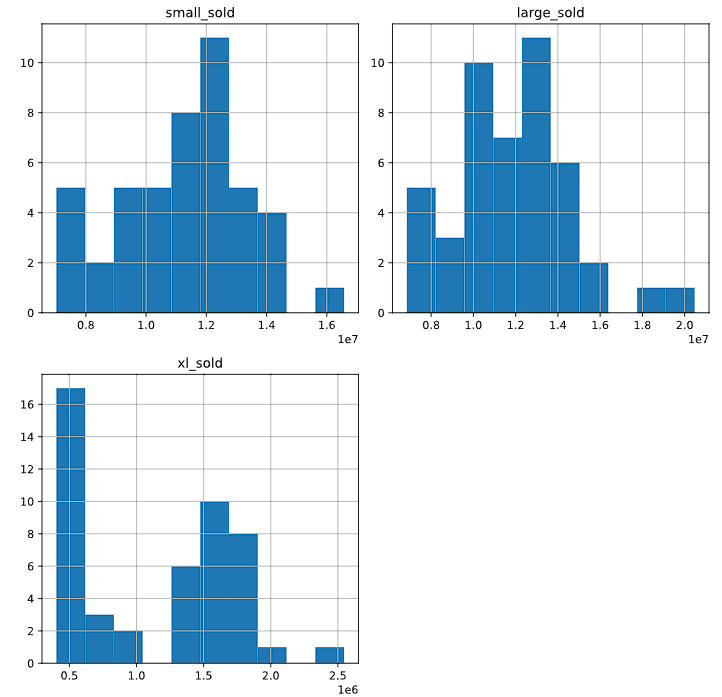

- Replace the missing values of `avocados_2016` with 0s and store the result as `avocados_filled`.
- Create a histogram of the `cols_with_missing` columns of `avocados_filled`.

In [ ]:
# From previous step
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
#avocados_2016[cols_with_missing].hist()
#plt.show()

# Fill in missing values with 0
#avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
#avocados_filled[cols_with_missing].hist()

# Show the plot
#plt.show()

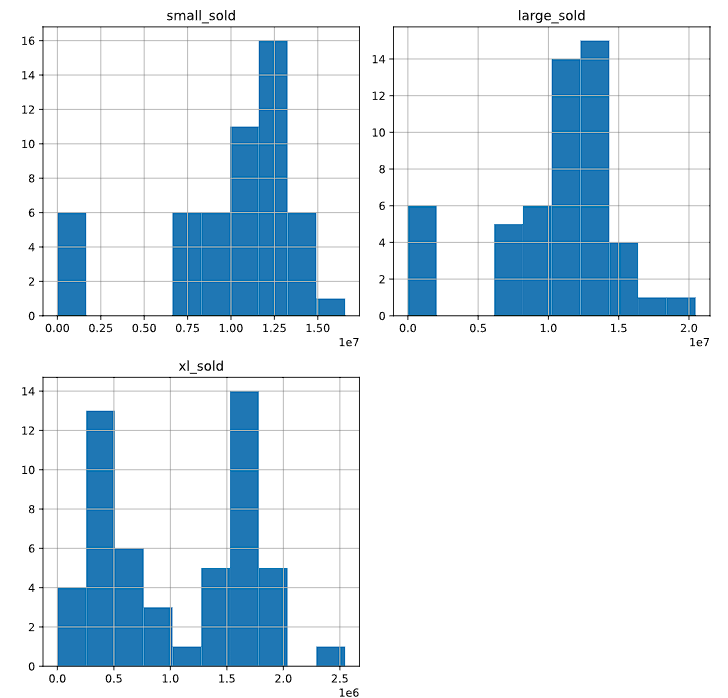

### Creating DataFrames
- {} - in making dictionaries
 - key: value 
- [] - to access value of a dictionary via their keys in square brackets

In [65]:
# Dictionaries
my_dict = {
    "title" : "Charlotte's Web",
    "author" : "E. B. White",
    "published" : 1952
}

In [66]:
my_dict['title']

"Charlotte's Web"

### Creating DataFrame

#### From a list of dictionaries
- constructed row by row

1. Create a list using square brackets to hold dictionaries.
2. Each key, on the left of each colon, will become the column name
   Each value, on the right of each colon, will become the list of column name

#### From a dictionary of lists
- constructed by column by column

In [73]:
# list of dictionaries - by row
list_of_dicts = [
    {"name": "Ginger", "breed": "Dachshund", "height_cm" : 22, "weight_kg": 10, "date_of_birth": "2019-03-14"},
    {"name": "Hansel", "breed": "Dalmatian", "height_cm" : 59, "weight_kg": 25, "date_of_birth": "2010-11-06"}
]

new_dogs = pd.DataFrame(list_of_dicts)
print(new_dogs)

     name      breed  height_cm  weight_kg date_of_birth
0  Ginger  Dachshund         22         10    2019-03-14
1  Hansel  Dalmatian         59         25    2010-11-06


#### From a dictionary of lists - by column
- constructed by column by column

In [72]:
dict_of_lists = {
    "name" : ["Ginger", "Hansel"],
    "breed" : ["Dachshund", "Dalmatian"],
    "height_cm" : [22, 59],
    "weight_kg": [10, 25],
    "date_of_birth": ["2019-03-14", "2010-11-06"]
}

new_dogs = pd.DataFrame(dict_of_lists)
print(new_dogs)

     name      breed  height_cm  weight_kg date_of_birth
0  Ginger  Dachshund         22         10    2019-03-14
1  Hansel  Dalmatian         59         25    2010-11-06


**List of dictionaries**

You recently got some new avocado data from 2019 that you'd like to put in a DataFrame using the list of dictionaries method. Remember that with this method, you go through the data row by row.

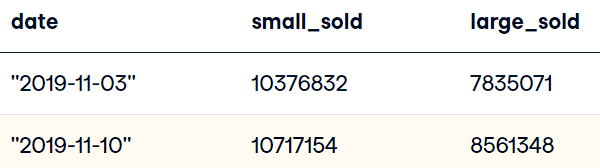
<br>
- Create a list of dictionaries with the new data called `avocados_list`.
- Convert the list into a DataFrame called `avocados_2019`.
- Print your new DataFrame.

In [74]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


**Dictionary of lists**

Some more data just came in! This time, you'll use the dictionary of lists method, parsing the data column by column.

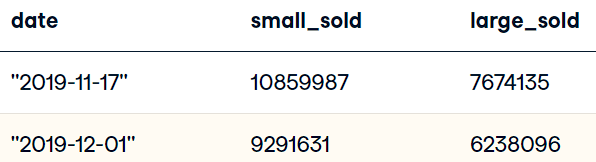
<br>
- Create a dictionary of lists with the new data called `avocados_dict`.
- Convert the dictionary to a DataFrame called `avocados_2019`.
- Print your new DataFrame.

In [75]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


In [ ]:
# CSV to DataFrame
# new_dog = pd.read_csv('new_dog.csv')
# print(new_dog)

# DataFrame to CSV
# new_dogs.to_csv('new_dogs.csv')